In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

#Import the requests library.
import requests

#Import the API key.
from config import weather_api_key

In [2]:
#Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
#Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
#Import the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
#Create a list for holding the cities.
cities = []

#Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    #If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count.
len(cities)

618

In [6]:
#Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

#Create an empty list to hold the weather data.
city_data = []

#Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

#Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [7]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key + "&q="

In [8]:
#Loop through all the cities in list.
for i, city in enumerate(cities):

    #Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        
    #Create endpoint URL with each city.
    city_url = url + city.replace(" ","+")
    
    #Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    #Add 1 to the record count.
    record_count += 1
    
    #Run an API request for each of the cities.
    try:
        #Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        #Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        #Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        #Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    #If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

#Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | ushuaia
Processing Record 2 of Set 1 | mrirt
City not found. Skipping...
Processing Record 3 of Set 1 | punta arenas
Processing Record 4 of Set 1 | quatre cocos
Processing Record 5 of Set 1 | tasiilaq
Processing Record 6 of Set 1 | naze
Processing Record 7 of Set 1 | galeana
Processing Record 8 of Set 1 | kahului
Processing Record 9 of Set 1 | kirakira
Processing Record 10 of Set 1 | dunedin
Processing Record 11 of Set 1 | burgeo
Processing Record 12 of Set 1 | gubkinskiy
Processing Record 13 of Set 1 | jamestown
Processing Record 14 of Set 1 | barrow
Processing Record 15 of Set 1 | port macquarie
Processing Record 16 of Set 1 | maniitsoq
Processing Record 17 of Set 1 | guerrero negro
Processing Record 18 of Set 1 | tiksi
Processing Record 19 of Set 1 | mataura
Processing Record 20 of Set 1 | geraldton
Processing Record 21 of Set 1 | nambiyur
Processing Record 22 of Set 1 | yar-sale
Processing Record 23 of Set 1 | loule
Processing Record 24 of Set 1 | upe

Processing Record 37 of Set 4 | atambua
Processing Record 38 of Set 4 | port elizabeth
Processing Record 39 of Set 4 | irondequoit
Processing Record 40 of Set 4 | tsumeb
Processing Record 41 of Set 4 | deputatskiy
Processing Record 42 of Set 4 | atuona
Processing Record 43 of Set 4 | nola
Processing Record 44 of Set 4 | snyder
Processing Record 45 of Set 4 | sujiatun
Processing Record 46 of Set 4 | clyde river
Processing Record 47 of Set 4 | jackson
Processing Record 48 of Set 4 | rio gallegos
Processing Record 49 of Set 4 | oktyabrskoye
Processing Record 50 of Set 4 | grand forks
Processing Record 1 of Set 5 | umzimvubu
City not found. Skipping...
Processing Record 2 of Set 5 | port blair
Processing Record 3 of Set 5 | tignere
Processing Record 4 of Set 5 | bethel
Processing Record 5 of Set 5 | inirida
Processing Record 6 of Set 5 | piterka
Processing Record 7 of Set 5 | opuwo
Processing Record 8 of Set 5 | kelvington
Processing Record 9 of Set 5 | broken hill
Processing Record 10 of 

Processing Record 31 of Set 8 | sibolga
Processing Record 32 of Set 8 | axim
Processing Record 33 of Set 8 | krasnyy chikoy
Processing Record 34 of Set 8 | saint anthony
Processing Record 35 of Set 8 | shache
Processing Record 36 of Set 8 | ishigaki
Processing Record 37 of Set 8 | chicama
Processing Record 38 of Set 8 | ous
Processing Record 39 of Set 8 | mareeba
Processing Record 40 of Set 8 | lolua
City not found. Skipping...
Processing Record 41 of Set 8 | coquimbo
Processing Record 42 of Set 8 | barabai
Processing Record 43 of Set 8 | sur
Processing Record 44 of Set 8 | birao
Processing Record 45 of Set 8 | sarangpur
Processing Record 46 of Set 8 | port hedland
Processing Record 47 of Set 8 | ambilobe
Processing Record 48 of Set 8 | haines junction
Processing Record 49 of Set 8 | amapa
Processing Record 50 of Set 8 | belmonte
Processing Record 1 of Set 9 | uzhur
Processing Record 2 of Set 9 | jacqueville
Processing Record 3 of Set 9 | dno
Processing Record 4 of Set 9 | mahebourg
Pr

Processing Record 17 of Set 12 | jumla
Processing Record 18 of Set 12 | paamiut
Processing Record 19 of Set 12 | jimenez
Processing Record 20 of Set 12 | candawaga
City not found. Skipping...
Processing Record 21 of Set 12 | peniche
Processing Record 22 of Set 12 | mabaruma
Processing Record 23 of Set 12 | jaisalmer
Processing Record 24 of Set 12 | mapimi
Processing Record 25 of Set 12 | karaton
Processing Record 26 of Set 12 | kumluca
Processing Record 27 of Set 12 | natal
Processing Record 28 of Set 12 | karratha
Processing Record 29 of Set 12 | carsamba
Processing Record 30 of Set 12 | aksarka
Processing Record 31 of Set 12 | cizre
Processing Record 32 of Set 12 | san policarpo
Processing Record 33 of Set 12 | olafsvik
Processing Record 34 of Set 12 | satitoa
City not found. Skipping...
Processing Record 35 of Set 12 | urucara
Processing Record 36 of Set 12 | leh
Processing Record 37 of Set 12 | ambovombe
Processing Record 38 of Set 12 | consett
Processing Record 39 of Set 12 | etch

In [9]:
len(city_data)

570

In [10]:
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ushuaia,-54.8000,-68.3000,33.46,93,75,19.57,AR,2021-10-24 21:03:24
1,Punta Arenas,-53.1500,-70.9167,46.51,36,75,33.38,CL,2021-10-24 21:05:04
2,Quatre Cocos,-20.2078,57.7625,74.08,71,81,13.00,MU,2021-10-24 21:07:30
3,Tasiilaq,65.6145,-37.6368,30.36,92,100,33.58,GL,2021-10-24 21:07:31
4,Naze,28.3667,129.4833,71.47,68,91,11.01,JP,2021-10-24 21:07:31
5,Galeana,24.8333,-100.0667,84.31,35,99,6.29,MX,2021-10-24 21:05:29
6,Kahului,20.8947,-156.4700,86.02,67,40,17.27,US,2021-10-24 21:07:33
7,Kirakira,-10.4544,161.9205,82.76,76,46,8.05,SB,2021-10-24 21:05:11
8,Dunedin,-45.8742,170.5036,59.81,78,87,5.01,NZ,2021-10-24 21:07:33
9,Burgeo,47.6167,-57.6152,51.62,91,99,37.42,CA,2021-10-24 21:07:34


In [11]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_sorted_df = city_data_df[new_column_order]
city_data_sorted_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ushuaia,AR,2021-10-24 21:03:24,-54.8000,-68.3000,33.46,93,75,19.57
1,Punta Arenas,CL,2021-10-24 21:05:04,-53.1500,-70.9167,46.51,36,75,33.38
2,Quatre Cocos,MU,2021-10-24 21:07:30,-20.2078,57.7625,74.08,71,81,13.00
3,Tasiilaq,GL,2021-10-24 21:07:31,65.6145,-37.6368,30.36,92,100,33.58
4,Naze,JP,2021-10-24 21:07:31,28.3667,129.4833,71.47,68,91,11.01
5,Galeana,MX,2021-10-24 21:05:29,24.8333,-100.0667,84.31,35,99,6.29
6,Kahului,US,2021-10-24 21:07:33,20.8947,-156.4700,86.02,67,40,17.27
7,Kirakira,SB,2021-10-24 21:05:11,-10.4544,161.9205,82.76,76,46,8.05
8,Dunedin,NZ,2021-10-24 21:07:33,-45.8742,170.5036,59.81,78,87,5.01
9,Burgeo,CA,2021-10-24 21:07:34,47.6167,-57.6152,51.62,91,99,37.42


In [12]:
#Create output file as CSV.
output_data_file = "weather_data/cities.csv"

#Export the City_Data into a CSV.
city_data_sorted_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
#Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

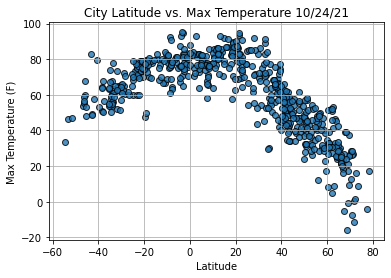

In [23]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

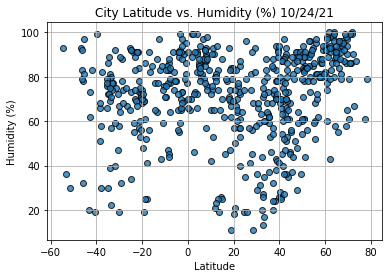

In [21]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity (%) "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

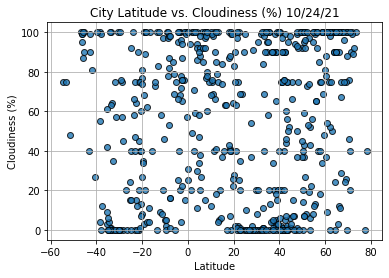

In [20]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

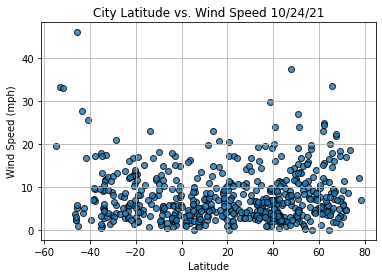

In [17]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [25]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [28]:
index13 = city_data_sorted_df.loc[13]
index13

City               Port Macquarie
Country                        AU
Date          2021-10-24 21:07:36
Lat                      -31.4333
Lng                      152.9167
Max Temp                    64.89
Humidity                       75
Cloudiness                     57
Wind Speed                   1.34
Name: 13, dtype: object

In [34]:
northern_hemi_df = city_data_sorted_df.loc[(city_data_sorted_df["Lat"] >= 0)]
southern_hemi_df = city_data_sorted_df.loc[(city_data_sorted_df["Lat"] <= 0)]

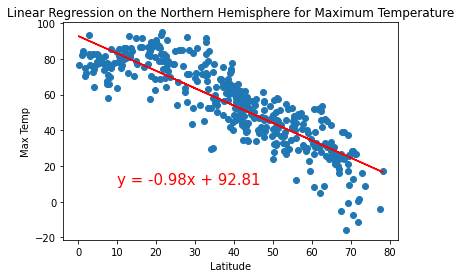

In [40]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp',(10,10))

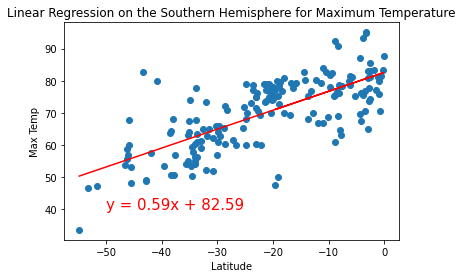

In [41]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-50,40))

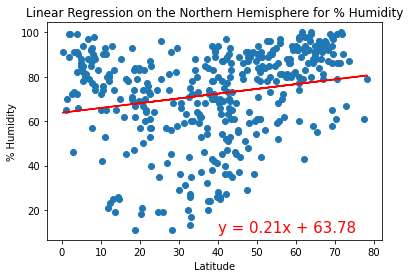

In [44]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity',(40,10))

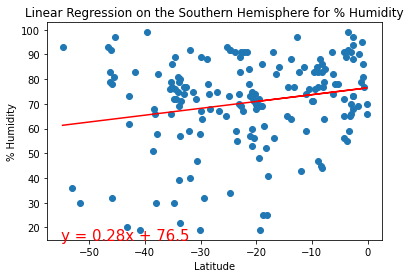

In [47]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-55,15))

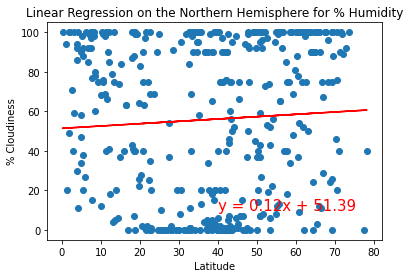

In [48]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Cloudiness', '% Cloudiness',(40,10))

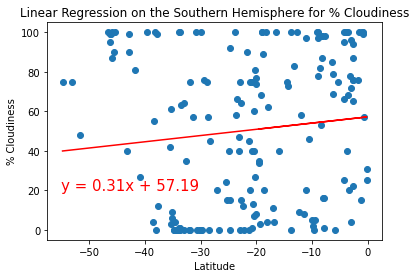

In [51]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-55,20))

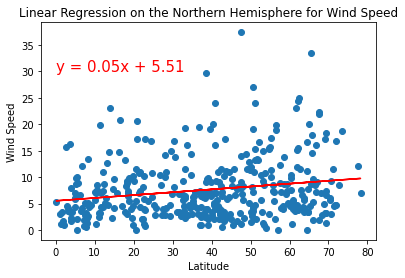

In [56]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(0,30))

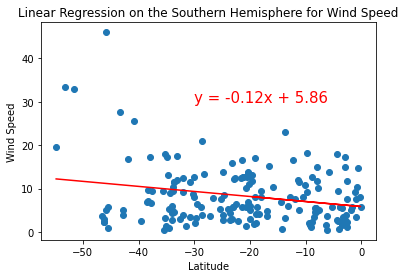

In [59]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-30,30))